# Imports

In [1]:
import sys
sys.path.append('../src/')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.metrics import pairwise_distances
from PIL import Image
from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

from DataSetFactory import DataSetFactory
from ClusterPlot import ClusterPlot

In [4]:
def get_num_clusters_birch(ds, threshold):
    num_clusters = 0
    for label in ds.df[ds.label_col].unique():
        label_data = ds.df[ds.df[ds.label_col]==label][ds.feature_cols].values
        birch = Birch(threshold=threshold, branching_factor=2, n_clusters=None)
        birch.fit(label_data)
        num_clusters += birch.subcluster_centers_.shape[0]
    return num_clusters

def birch_threshold_plot(X, ds):
    dist_mat = pairwise_distances(X)
    print(dist_mat.shape)
    threshold_candidates = np.unique(dist_mat)
    print(threshold_candidates.shape)
    # for the sake of the experiment let's evaluate all of them
    thresholds_df = pd.DataFrame(threshold_candidates, columns=['threshold'])
    thresholds_df['num_clusters'] = np.nan
    thresholds_df['num_points'] = ds.df.shape[0]
    thresholds_df.hist(['threshold'])
    plt.show()
    # Filter only thresholds smaller than 1.5
    # thresholds_df_sample = thresholds_df[thresholds_df['threshold']<=70]
    # thresholds_df_sample = thresholds_df_sample.sample(n=200, random_state=RANDOM_STATE)
    thresholds_df_sample = thresholds_df.sample(n=200)
    
    thresholds_df_sample['num_clusters'] = thresholds_df_sample['threshold'].transform(lambda t: get_num_clusters_birch(ds, t))
    thresholds_df_sample['compression'] = thresholds_df_sample['num_points'] / thresholds_df_sample['num_clusters']
    
    sns.lineplot(x='threshold', y='compression', data=thresholds_df_sample)
    sns.lineplot(x='threshold', y='num_clusters', data=thresholds_df_sample)

In [5]:
RANDOM_STATE = 42

# Load Data

In [4]:
ds_vgg = DataSetFactory.get_dataset('vgg_features_imagenet', RANDOM_STATE ,sample=0.15)
ds_densenet = DataSetFactory.get_dataset('densenet_features_imagenet', RANDOM_STATE ,sample=0.15)
ds_mobilenet = DataSetFactory.get_dataset('mobilenet_features_imagenet', RANDOM_STATE ,sample=0.15)

(7890, 4097) 7890
Taking sample of 0.15 from the data
(7888, 1025) 7888
Taking sample of 0.15 from the data
(7888, 1281) 7888
Taking sample of 0.15 from the data


In [5]:
X_vgg, y_vgg = ds_vgg.df[ds_vgg.feature_cols].values, ds_vgg.df[ds_vgg.label_col].values
X_densenet, y_densenet = ds_densenet.df[ds_densenet.feature_cols].values, ds_densenet.df[ds_densenet.label_col].values
X_mobilenet, y_mobilenet = ds_mobilenet.df[ds_mobilenet.feature_cols].values, ds_mobilenet.df[ds_mobilenet.label_col].values

(1184, 1184)
(670688,)


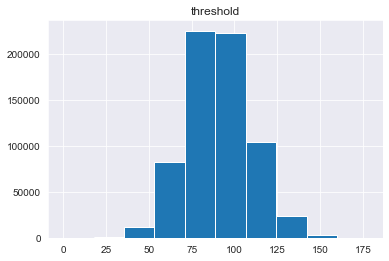

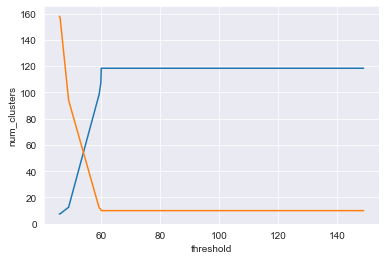

In [6]:
birch_threshold_plot(X_vgg, ds_vgg)

(1183, 1183)
(653640,)


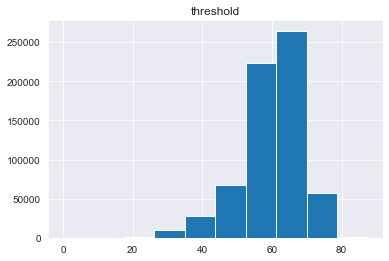

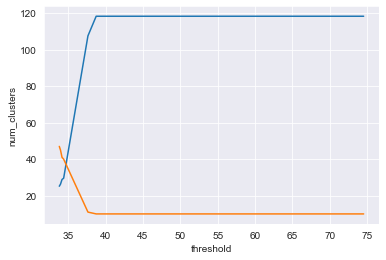

In [7]:
birch_threshold_plot(X_densenet, ds_densenet)

(1183, 1183)
(655835,)


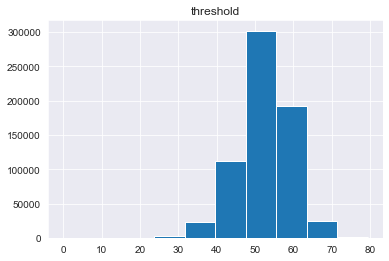

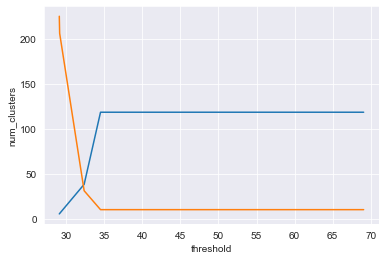

In [8]:
birch_threshold_plot(X_mobilenet, ds_mobilenet)

# VGG

In [6]:
vgg_cp = ClusterPlot(learning_rate=0.5, 
            n_iter=91, 
            batch_size=1,
            anchors_method='birch',
            birch_threshold=35,
            umap_n_neighbors=15,
            dataset='NetCompareAnimals',
            class_to_label=ds_vgg.class_to_label,
            show_fig=True,
            save_fig=True,
            k=20,
            random_state=RANDOM_STATE,
            save_fig_every=90,
            magnitude_step=True,
            top_greedy=5,
            show_anchors=False,
            supervised=False,
            alpha=[1,1,0,1,1,1,1,1,1,1],
            douglas_peucker_tolerance=1,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds_vgg.orig_images,
            annotate_images=False,
            stop_criteria=0,
            mask_sparse_subcluster=3,
            only_inter_relations=False,
            mask_relation_in_same_label=True)
print(vgg_cp)

ClusterPlot
addr:@8cf7c8
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=35
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=5
magnitude_step=True
n_iter=91
batch_size=1
stop_criteria=0
loss_func=<function ClusterPlot.l_inf_loss at 0x0000026BB47C2F78>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=3
random_points_method='voronoi'
class_to_label={0: 'Norwegian_elkhound', 1: 'golden_retriever', 2: 'Maltese_dog', 3: 'Scottish_deerhound', 4: 'Bedlington_terrier', 5: 'Blenheim_spaniel', 6: 'Boston_bull', 7: 'toy_terrier', 8: 'Rhodesian_ridgeback', 9: 'Afghan_hound'}
random_state=42
n_jobs=None
dataset='NetCompareAnimals'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[1, 1, 0, 1, 1, 1, 1, 1,

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


 40%|███████████████████████████████                                               | 684/1719 [00:01<00:03, 325.60it/s]

anchor 154 has no voronoi region, why? returning anchor instead of random point - probably not error


100%|█████████████████████████████████████████████████████████████████████████████| 1719/1719 [00:02<00:00, 600.83it/s]


Starting iteration 1 loss = 0.6
src: 150 target 235 dir -1 density 28loss: -0.6
src: 150 target 216 dir -1 density 28loss: -0.26666666666666666
src: 471 target 158 dir 1 density 9loss: 0.26282051282051283
src: 158 target 233 dir -1 density 31loss: -0.2465753424657534
src: 28 target 158 dir 1 density 5loss: 0.2403846153846154
Skipping polygon of label 0 with area 0.00016719116717212046
Skipping polygon of label 3 with area 0.00016719116717212046
Skipping polygon of label 3 with area 0.0001671871811153025
Skipping polygon of label 6 with area 0.00016719116717212046
Skipping polygon of label 6 with area 0.0001671871811153025
Skipping polygon of label 6 with area 0.0001671871811153025
Skipping polygon of label 8 with area 0.00016719116717212046


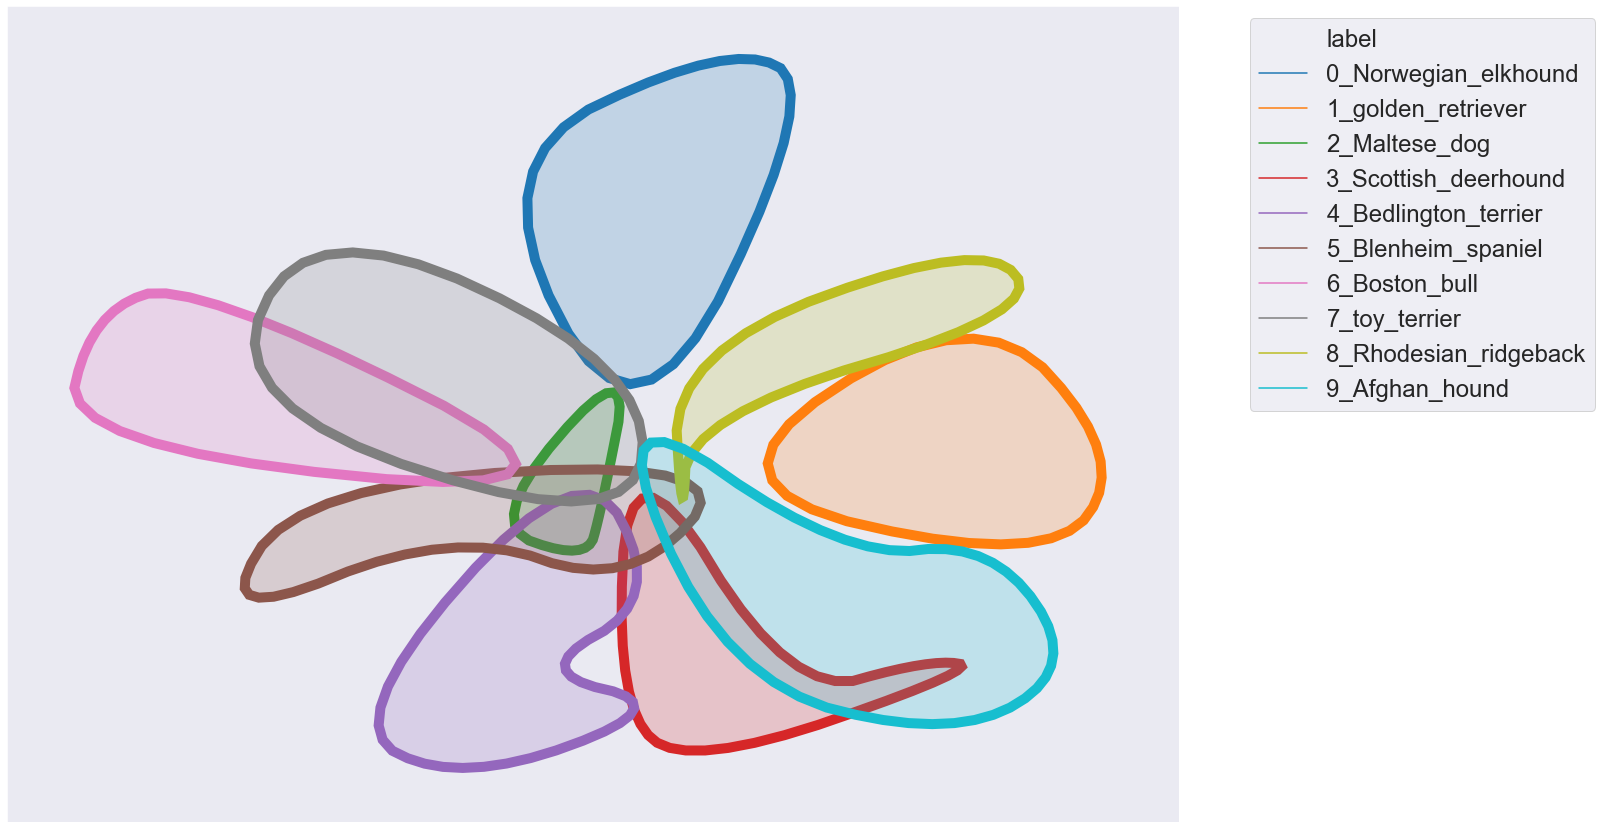

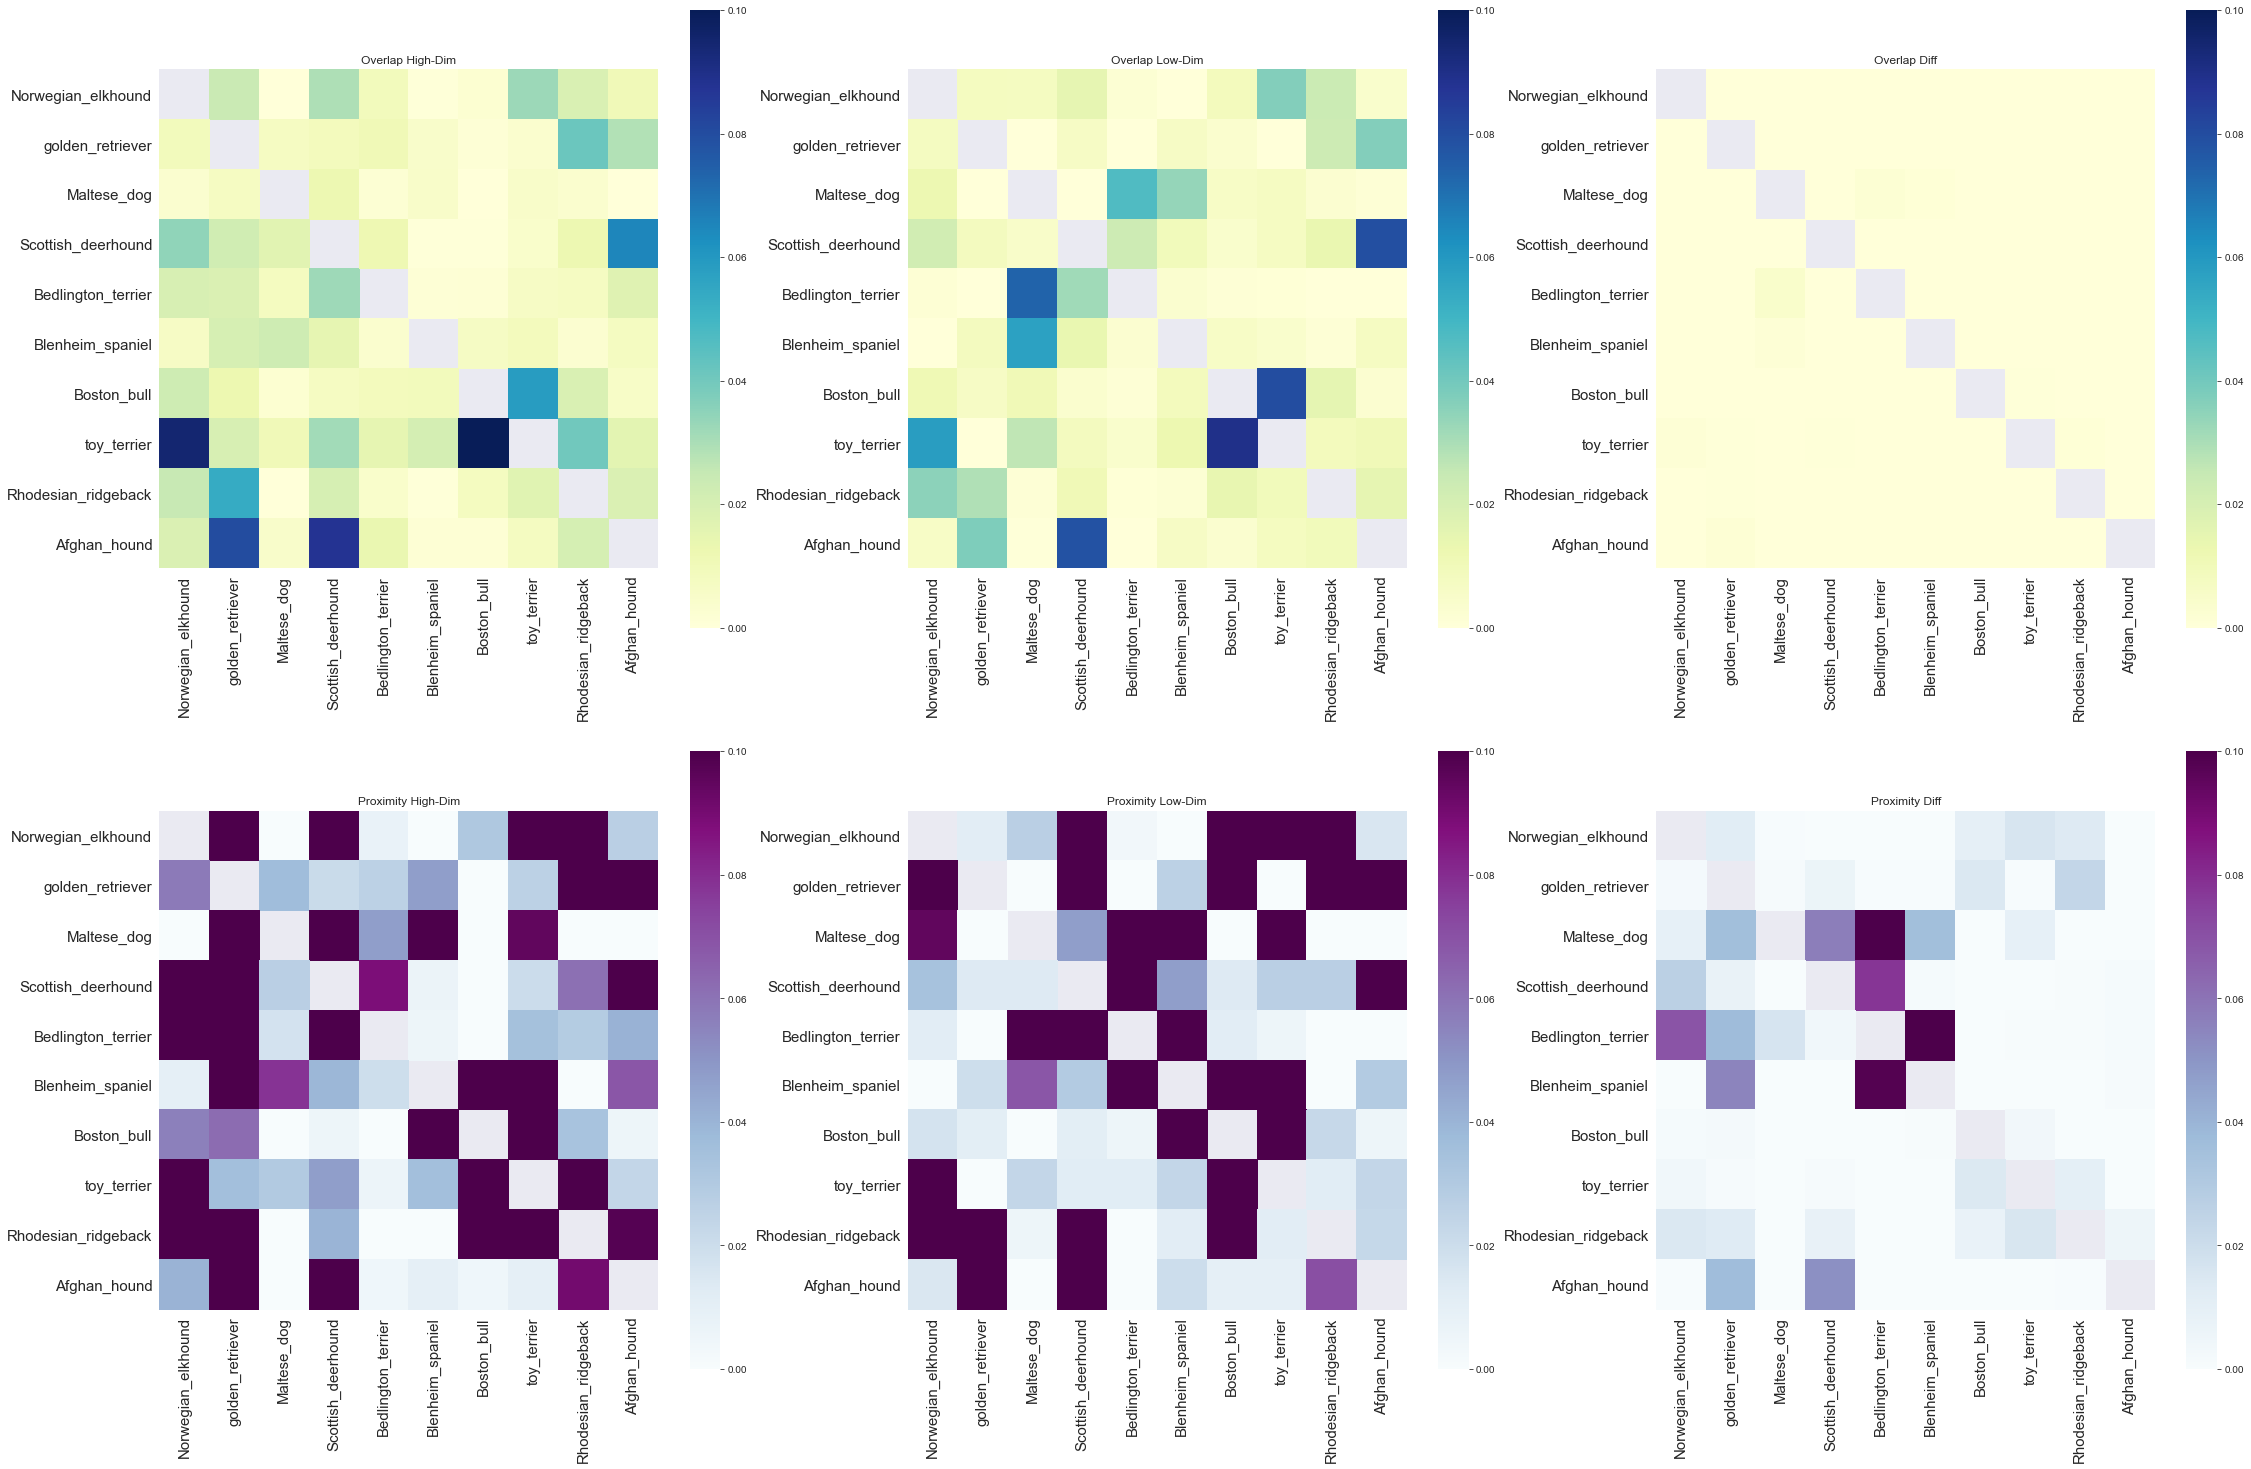

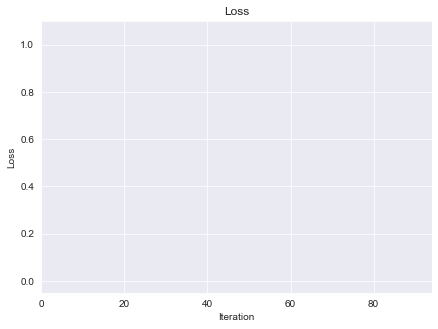

Starting iteration 2 loss = 0.6666666666666666
src: 150 target 235 dir -1 density 28loss: -0.6666666666666666
src: 158 target 233 dir -1 density 31loss: -0.24324324324324326
src: 28 target 158 dir 1 density 5loss: 0.2403846153846154
src: 471 target 158 dir 1 density 9loss: 0.23627184025414116
src: 150 target 184 dir -1 density 28loss: -0.21734892787524365
Starting iteration 3 loss = 0.4583333333333333
src: 150 target 235 dir -1 density 28loss: -0.4583333333333333
src: 150 target 184 dir -1 density 28loss: -0.42105263157894735
src: 28 target 158 dir 1 density 5loss: 0.2403846153846154
src: 149 target 263 dir -1 density 89loss: -0.21505376344086022
src: 158 target 233 dir -1 density 31loss: -0.21212121212121213
Starting iteration 4 loss = 0.31390977443609025
src: 150 target 184 dir -1 density 28loss: -0.31390977443609025
src: 28 target 158 dir 1 density 5loss: 0.2403846153846154
src: 150 target 235 dir -1 density 28loss: -0.21428571428571427
src: 149 target 222 dir -1 density 89loss: -0.

src: 162 target 150 dir -1 density 3loss: -0.19117647058823528
src: 150 target 196 dir -1 density 28loss: -0.19047619047619047
Starting iteration 48 loss = 0.43478260869565216
src: 150 target 160 dir -1 density 28loss: -0.43478260869565216
src: 159 target 150 dir -1 density 9loss: -0.3333333333333333
src: 156 target 150 dir -1 density 9loss: -0.23577235772357724
src: 149 target 230 dir -1 density 89loss: -0.2265193370165746
src: 149 target 263 dir -1 density 89loss: -0.22099447513812154
Starting iteration 49 loss = 0.40816326530612246
src: 150 target 160 dir -1 density 28loss: -0.40816326530612246
src: 159 target 150 dir -1 density 9loss: -0.35537190082644626
src: 156 target 150 dir -1 density 9loss: -0.3114754098360656
src: 150 target 156 dir -1 density 28loss: -0.22448979591836735
src: 149 target 230 dir -1 density 89loss: -0.21739130434782608
Starting iteration 50 loss = 0.45098039215686275
src: 150 target 160 dir -1 density 28loss: -0.45098039215686275
src: 159 target 150 dir -1 de

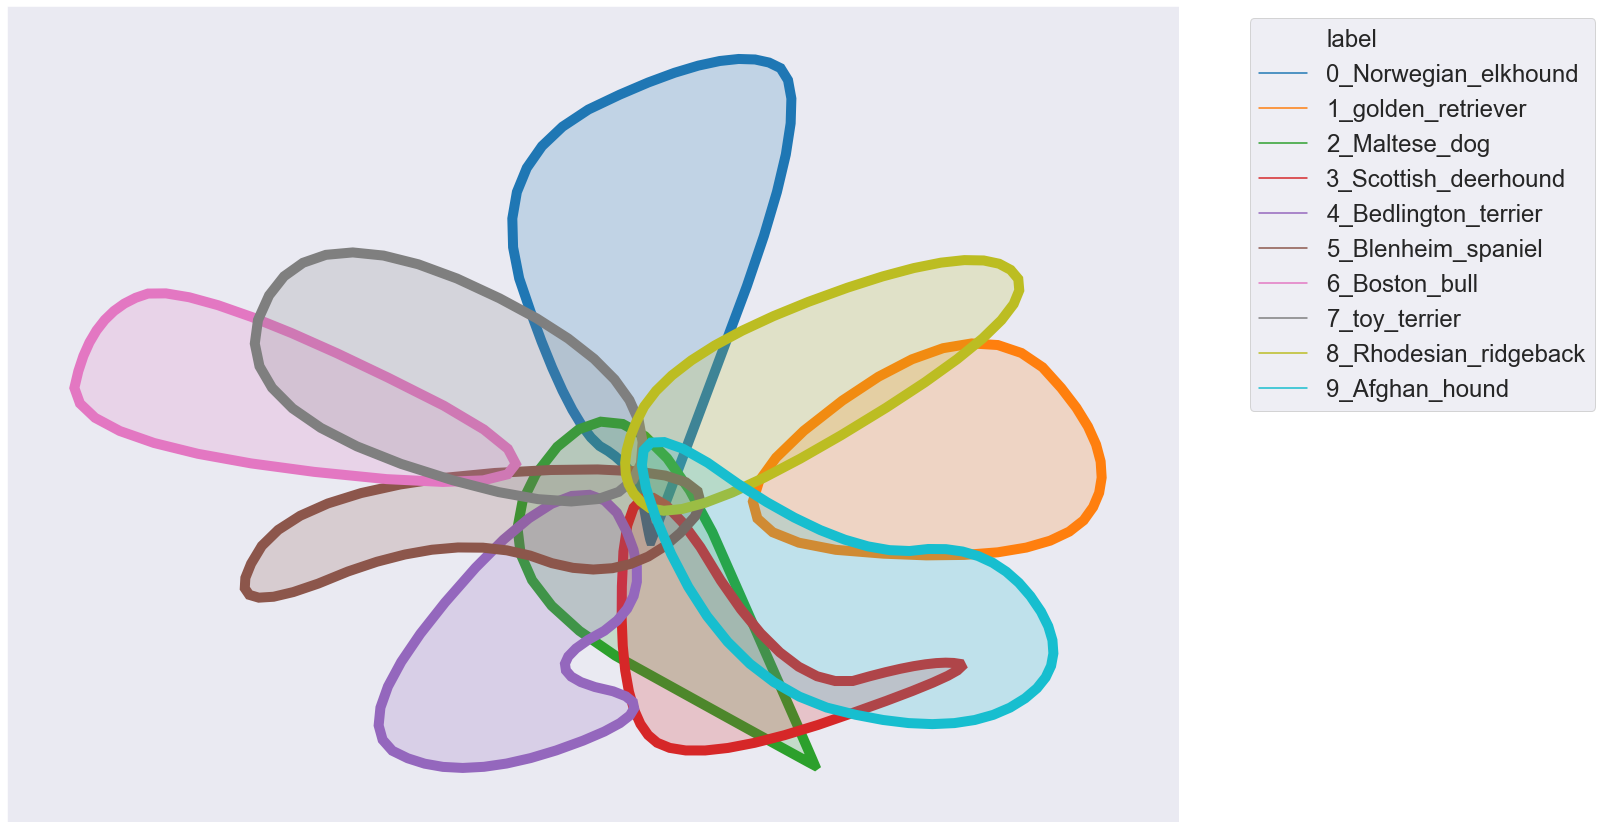

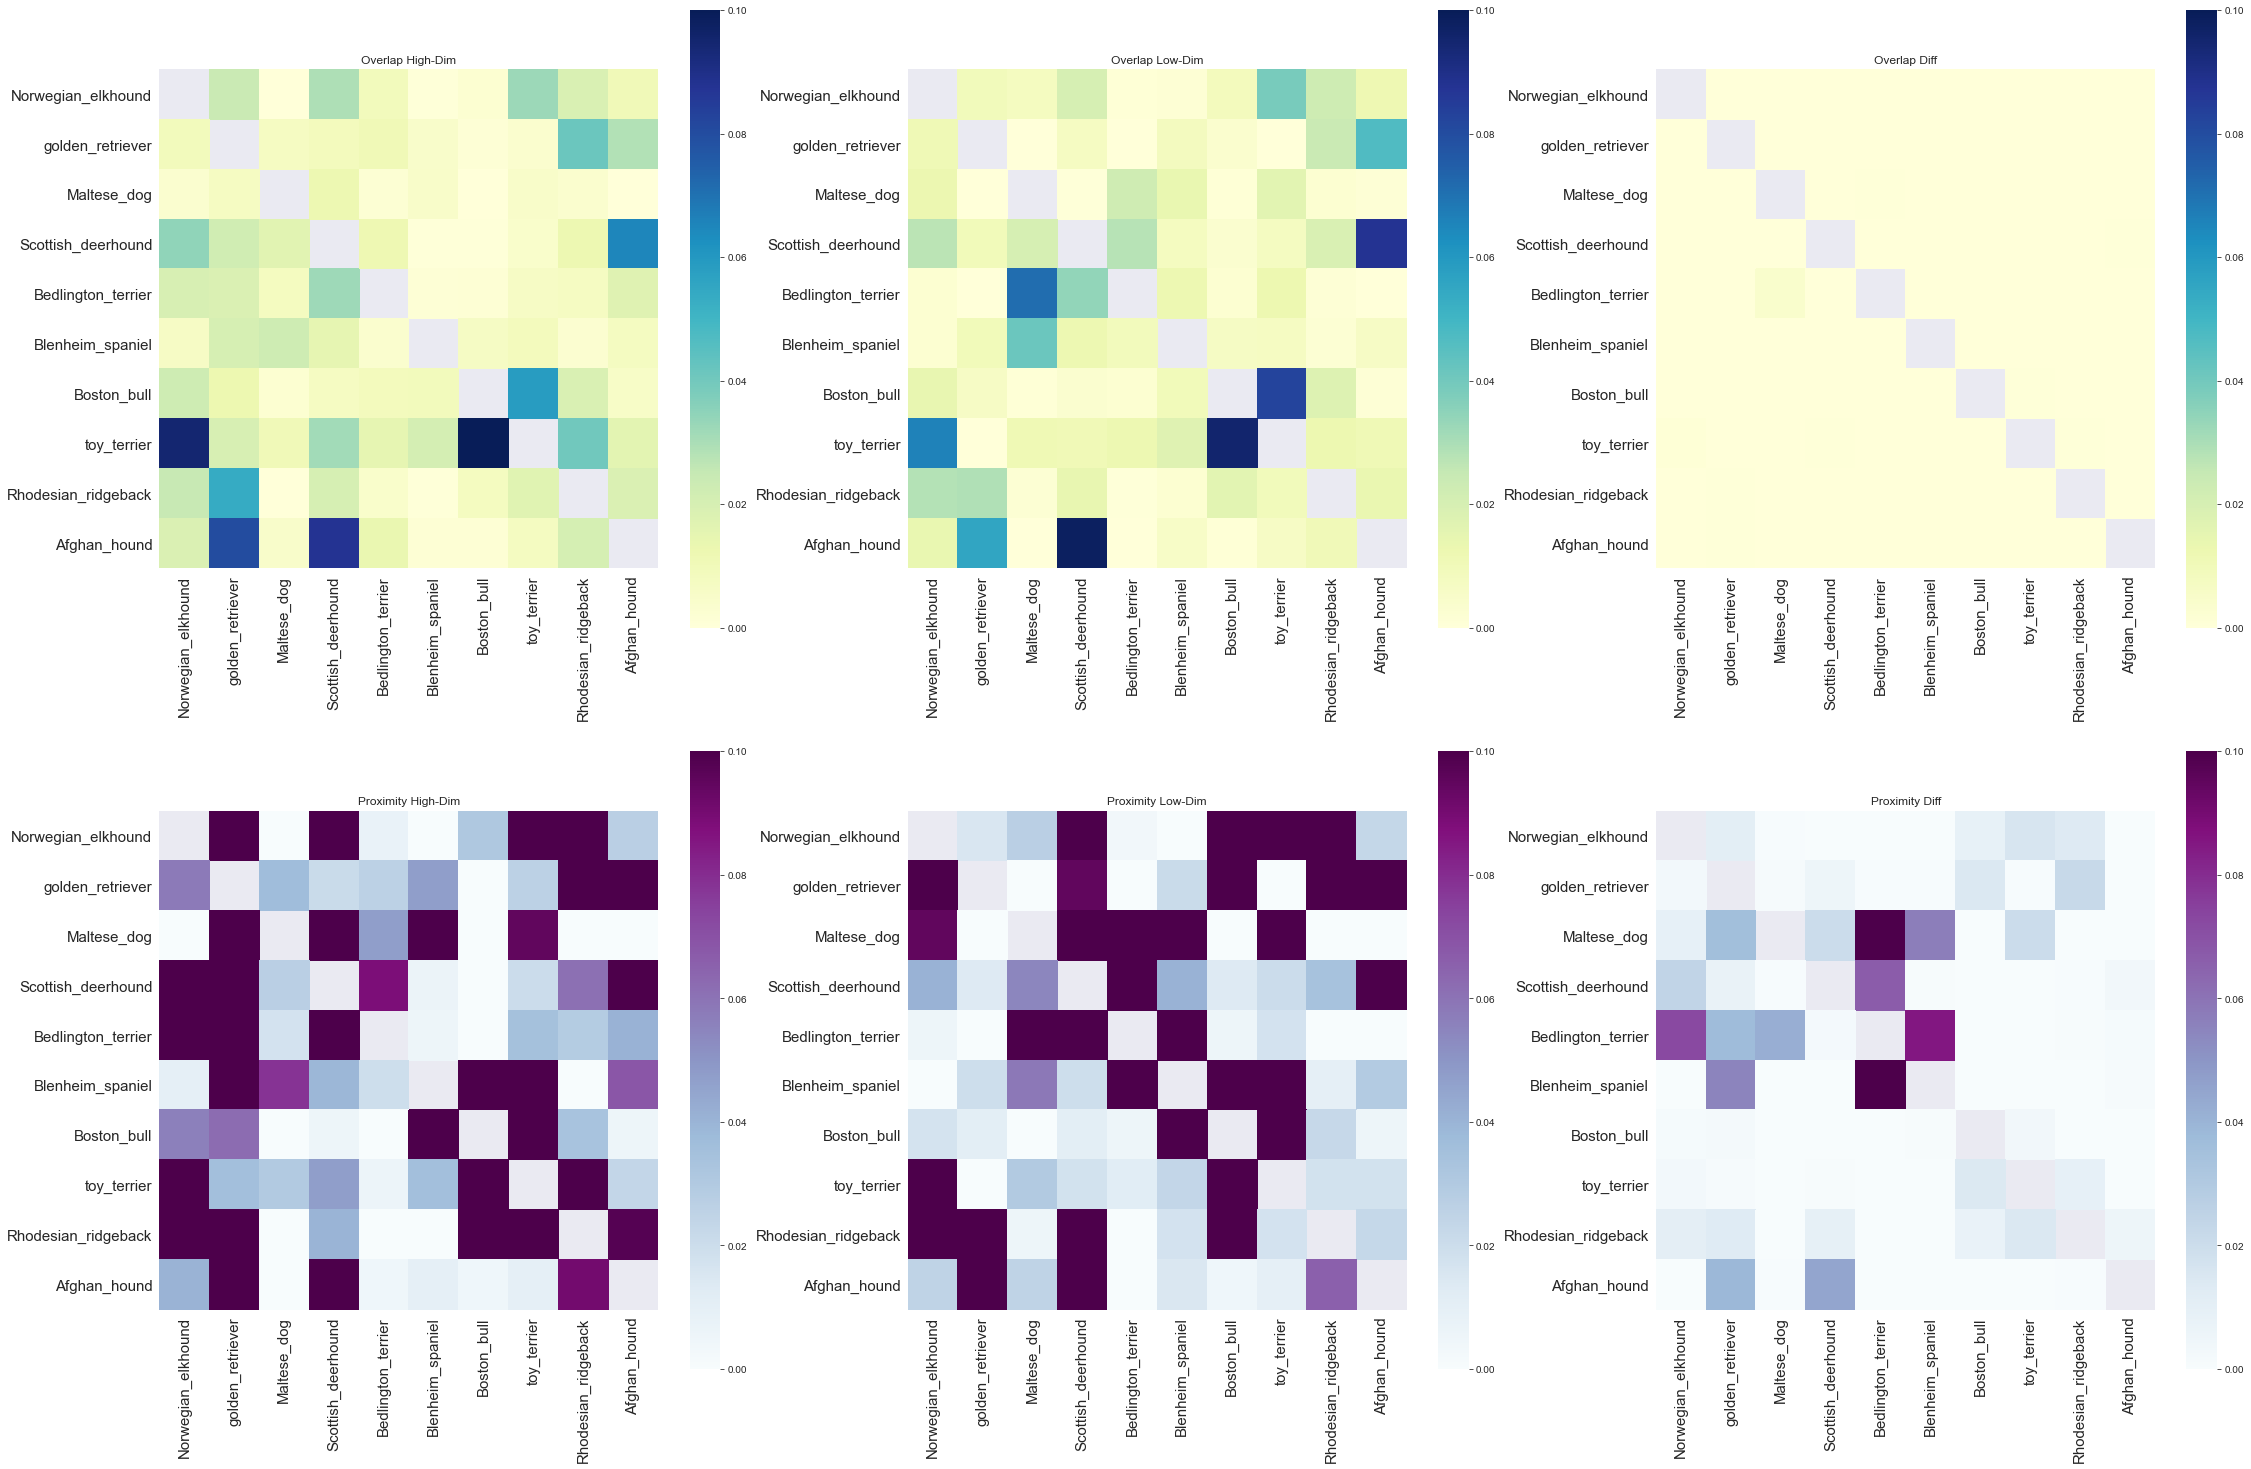

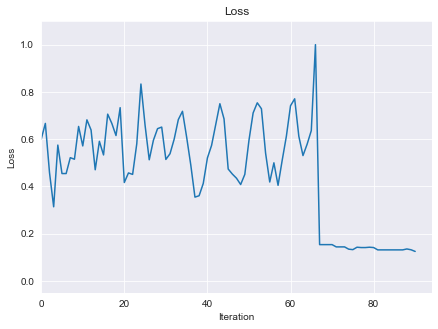

In [7]:
vgg_low_dim = vgg_cp.fit_transform(X_vgg, y_vgg)

# Densenet

In [8]:
densenet_cp = ClusterPlot(learning_rate=0.5, 
            n_iter=1, 
            batch_size=0,
            anchors_method='birch',
            birch_threshold=20,
            umap_n_neighbors=15,
            dataset='NetCompareAnimals',
            class_to_label=ds_densenet.class_to_label,
            show_fig=True,
            save_fig=True,
            k=20,
            random_state=RANDOM_STATE,
            save_fig_every=15,
            magnitude_step=True,
            top_greedy=5,
            show_anchors=False,
            supervised=False,
            alpha=[0.3,0,0.4,0,0.3,0,0,0.3,0.3,0.3],
            douglas_peucker_tolerance=0.3,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds_densenet.orig_images,
            annotate_images=False,
            stop_criteria=0,
            mask_sparse_subcluster=3,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            skip_polygons_with_area=0.1)
print(densenet_cp)

ClusterPlot
addr:@5f2308
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=20
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=5
magnitude_step=True
n_iter=1
batch_size=0
stop_criteria=0
loss_func=<function ClusterPlot.l_inf_loss at 0x0000026BB47C2F78>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=3
random_points_method='voronoi'
class_to_label={0: 'Norwegian_elkhound', 1: 'golden_retriever', 2: 'Maltese_dog', 3: 'Scottish_deerhound', 4: 'Bedlington_terrier', 5: 'Blenheim_spaniel', 6: 'Boston_bull', 7: 'toy_terrier', 8: 'Rhodesian_ridgeback', 9: 'Afghan_hound'}
random_state=42
n_jobs=None
dataset='NetCompareAnimals'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0.3, 0, 0.4, 0, 0.3, 0, 

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor
bug


 34%|██████████████████████████▎                                                   | 674/1997 [00:00<00:01, 719.68it/s]

anchor 779 has no voronoi region, why? returning anchor instead of random point - probably not error


100%|████████████████████████████████████████████████████████████████████████████| 1997/1997 [00:01<00:00, 1139.63it/s]


Starting iteration 1 loss = 0.1323529411764706
Skipping polygon of label 0 with area 0.0001671951533239735
Skipping polygon of label 2 with area 0.0001671951533239735
Skipping polygon of label 2 with area 0.0001671871811153025
Skipping polygon of label 4 with area 0.0178294322210306
Skipping polygon of label 7 with area 0.012268064925401223
Skipping polygon of label 9 with area 0.0001671951533239735


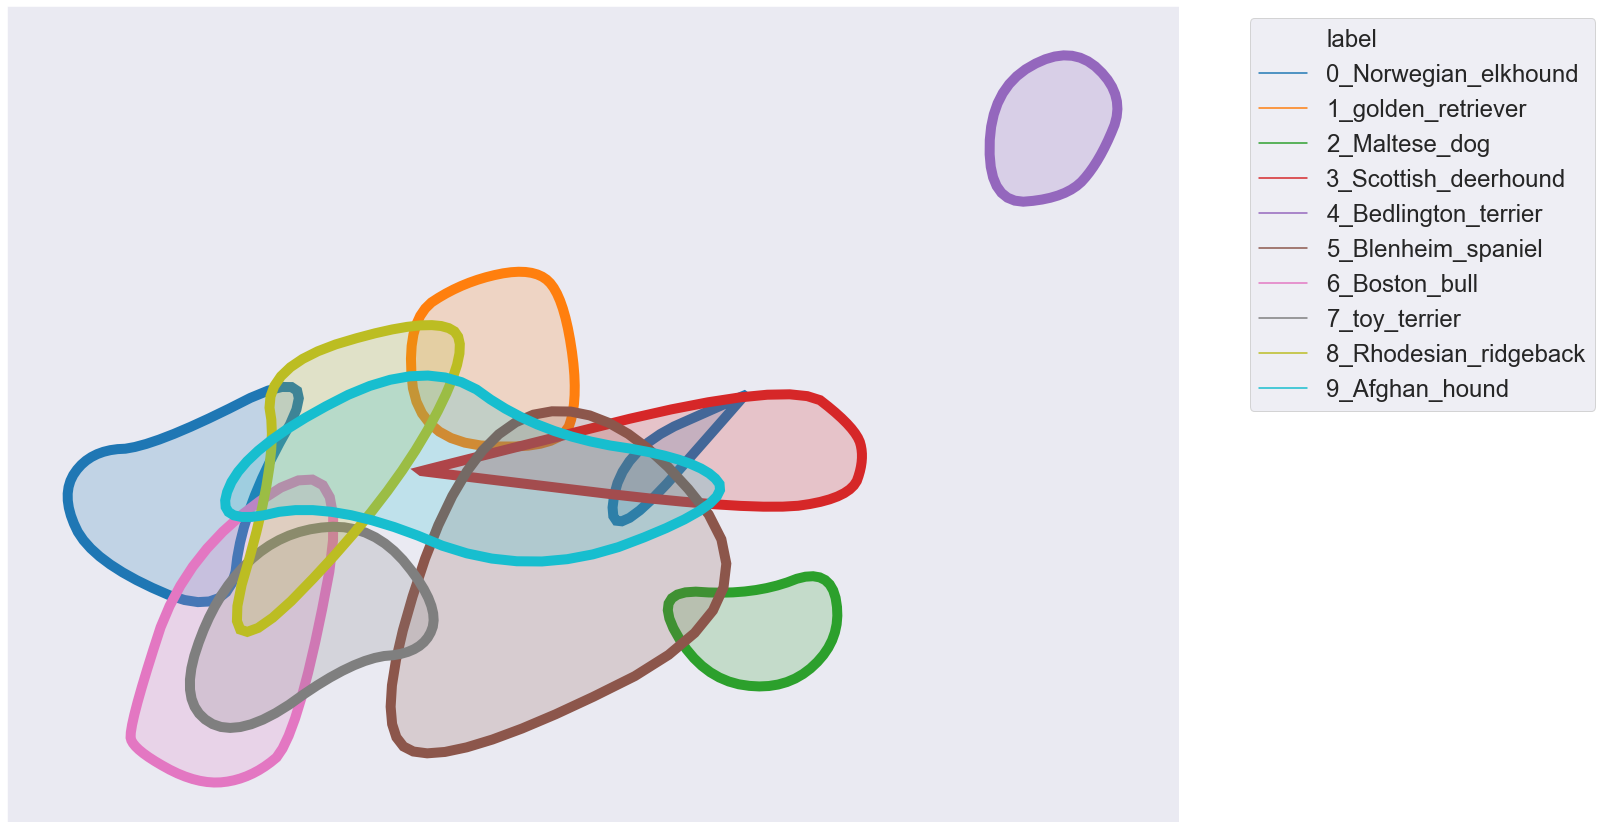

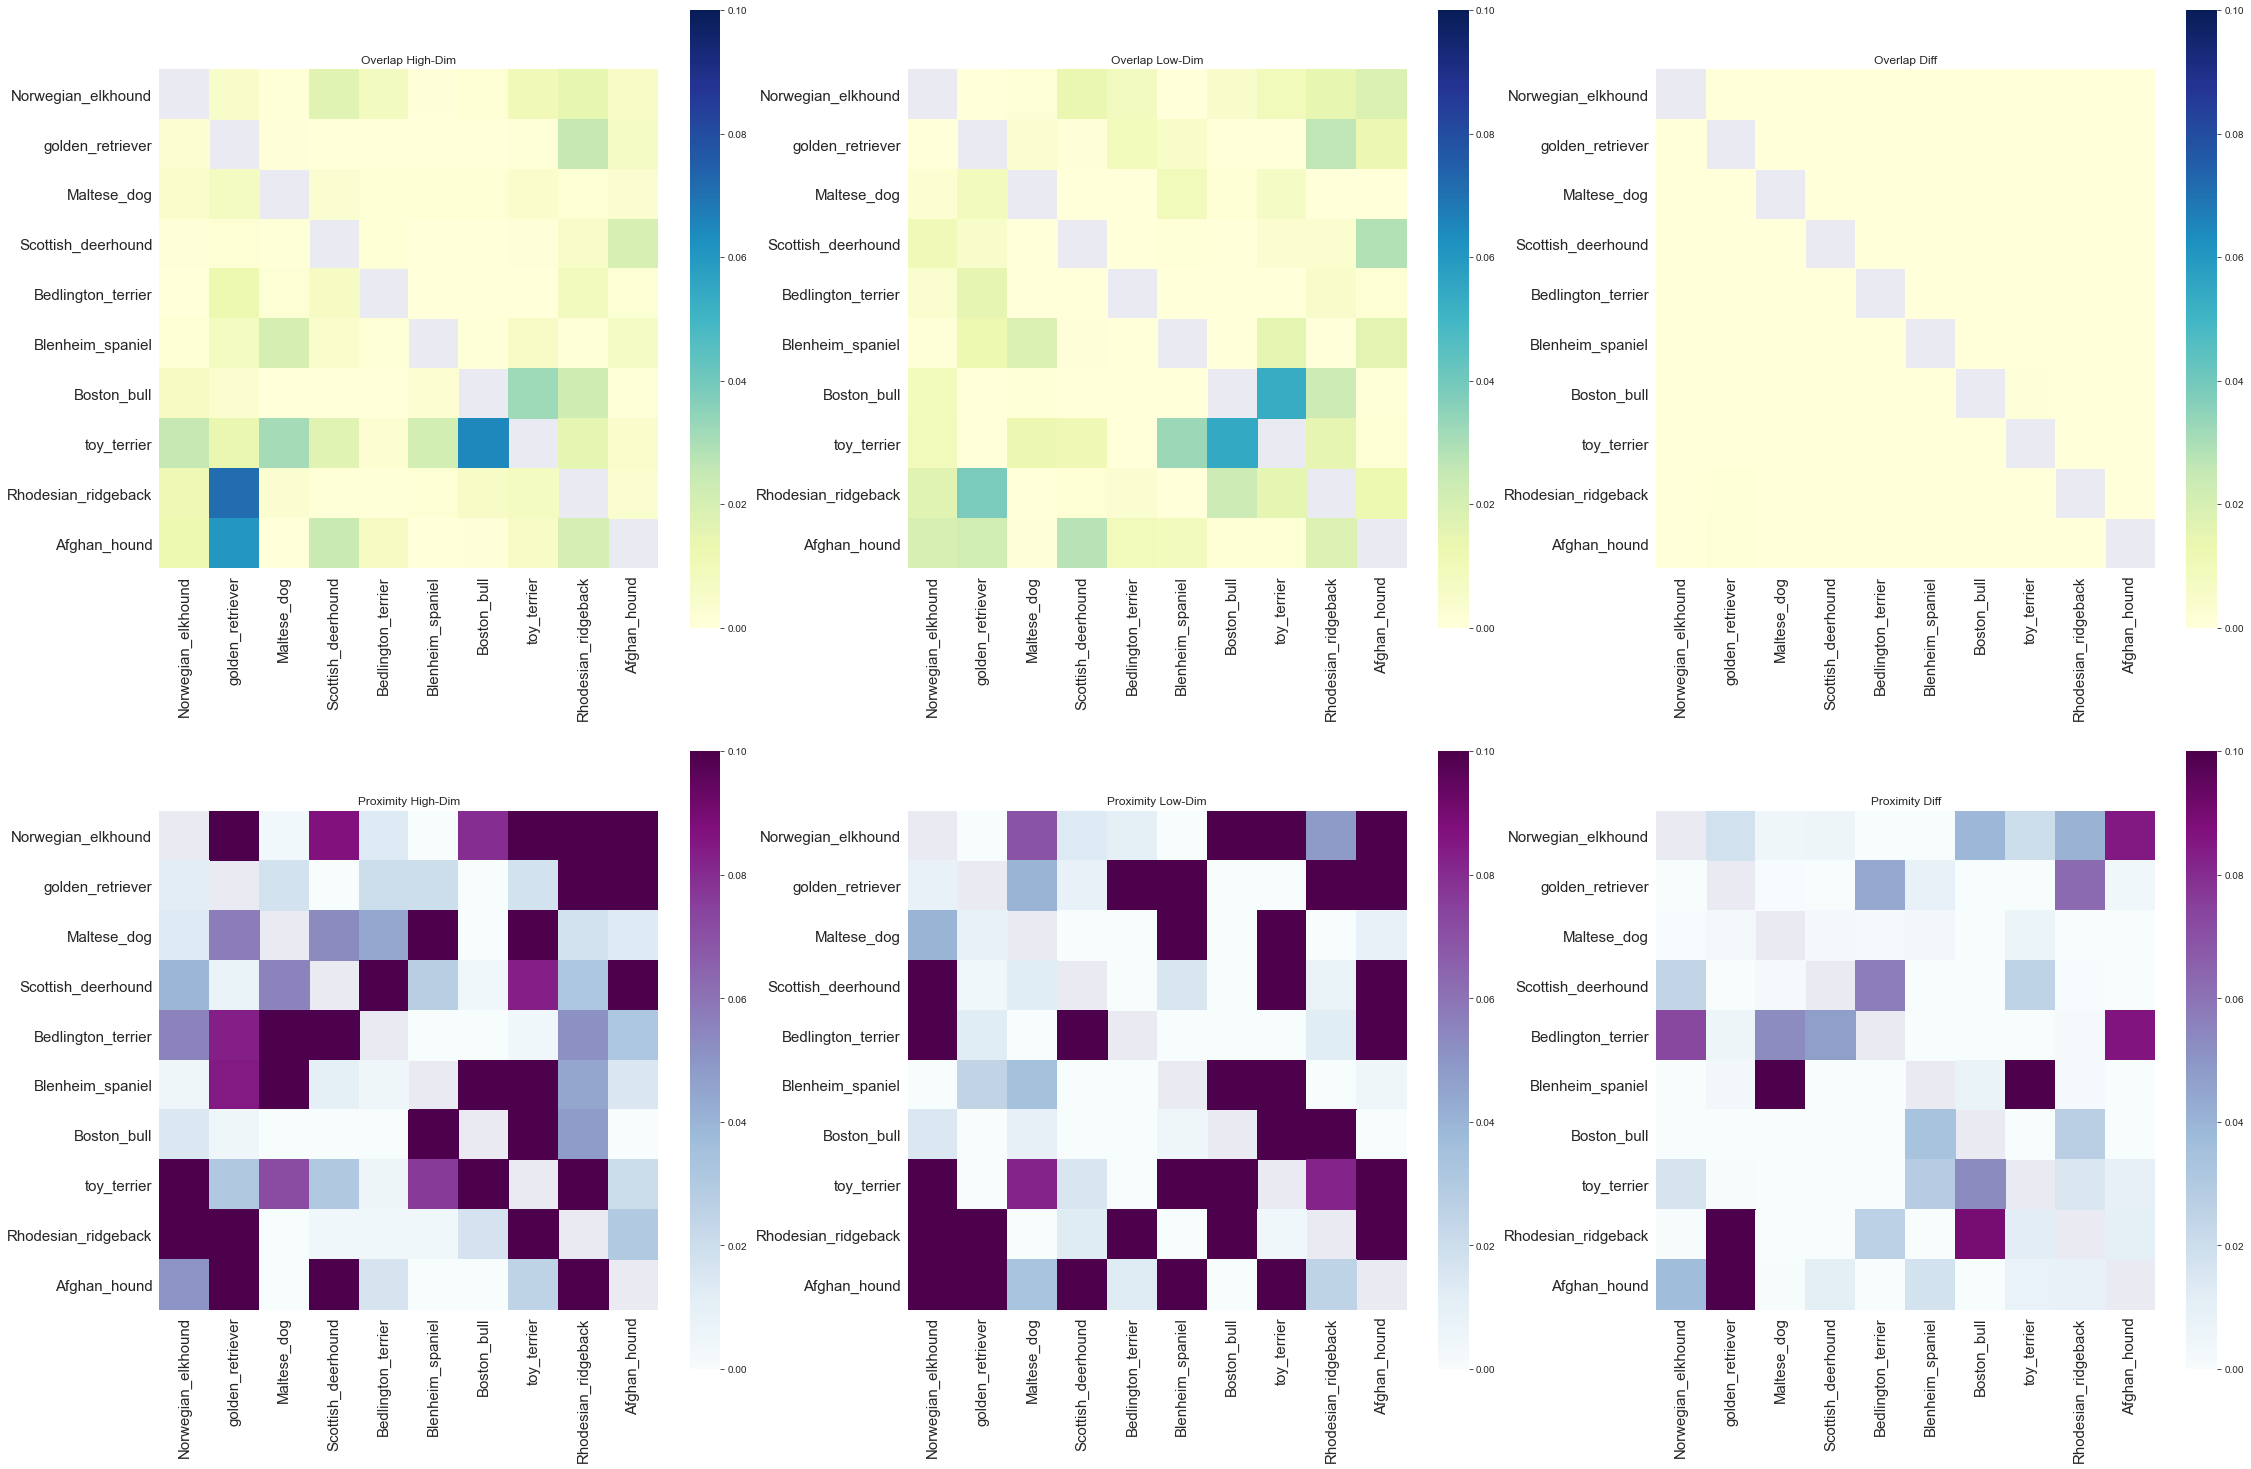

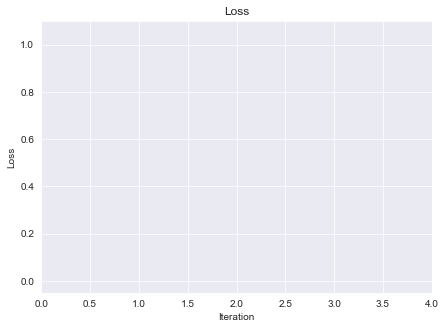

In [9]:
densenet_low_dim = densenet_cp.fit_transform(X_densenet, y_densenet)

In [10]:
densenet_cp.num_clusters_each_label

array([ 96, 116,  75,  84,  84,  67,  69,  65,  78,  80], dtype=int64)

# MobileNet

In [11]:
mobilenet_cp = ClusterPlot(learning_rate=0.5, 
            n_iter=1, 
            batch_size=0,
            anchors_method='birch',
            birch_threshold=20,
            umap_n_neighbors=15,
            dataset='NetCompareAnimals',
            class_to_label=ds_mobilenet.class_to_label,
            show_fig=True,
            save_fig=True,
            k=20,
            random_state=RANDOM_STATE,
            save_fig_every=10,
            magnitude_step=True,
            top_greedy=5,
            show_anchors=False,
            supervised=False,
            alpha=[0.6,0.9,0.5,0.9,0.5,0.5,0.8,0.9,0.5,0.5],
            douglas_peucker_tolerance=0.3,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds_mobilenet.orig_images,
            annotate_images=False,
            stop_criteria=0,
            mask_sparse_subcluster=3,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            skip_polygons_with_area = 0.1)
print(mobilenet_cp)

ClusterPlot
addr:@55bec8
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=20
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=5
magnitude_step=True
n_iter=1
batch_size=0
stop_criteria=0
loss_func=<function ClusterPlot.l_inf_loss at 0x0000026BB47C2F78>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=3
random_points_method='voronoi'
class_to_label={0: 'Norwegian_elkhound', 1: 'golden_retriever', 2: 'Maltese_dog', 3: 'Scottish_deerhound', 4: 'Bedlington_terrier', 5: 'Blenheim_spaniel', 6: 'Boston_bull', 7: 'toy_terrier', 8: 'Rhodesian_ridgeback', 9: 'Afghan_hound'}
random_state=42
n_jobs=None
dataset='NetCompareAnimals'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0.6, 0.9, 0.5, 0.9, 0.5,

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|████████████████████████████████████████████████████████████████████████████| 2058/2058 [00:01<00:00, 1500.66it/s]


Starting iteration 1 loss = 0.13043478260869565
Skipping polygon of label 1 with area 0.0001671871811153025
Skipping polygon of label 2 with area 0.021207417815302828
Skipping polygon of label 4 with area 0.0001671871811153025
Skipping polygon of label 5 with area 0.0001671871811153025
Skipping polygon of label 6 with area 0.0001671871811153025
Skipping polygon of label 6 with area 0.00016719116717212046
Skipping polygon of label 7 with area 0.01511052555107241
Skipping polygon of label 7 with area 0.00016719116717212046
Skipping polygon of label 8 with area 0.0001671951533239735


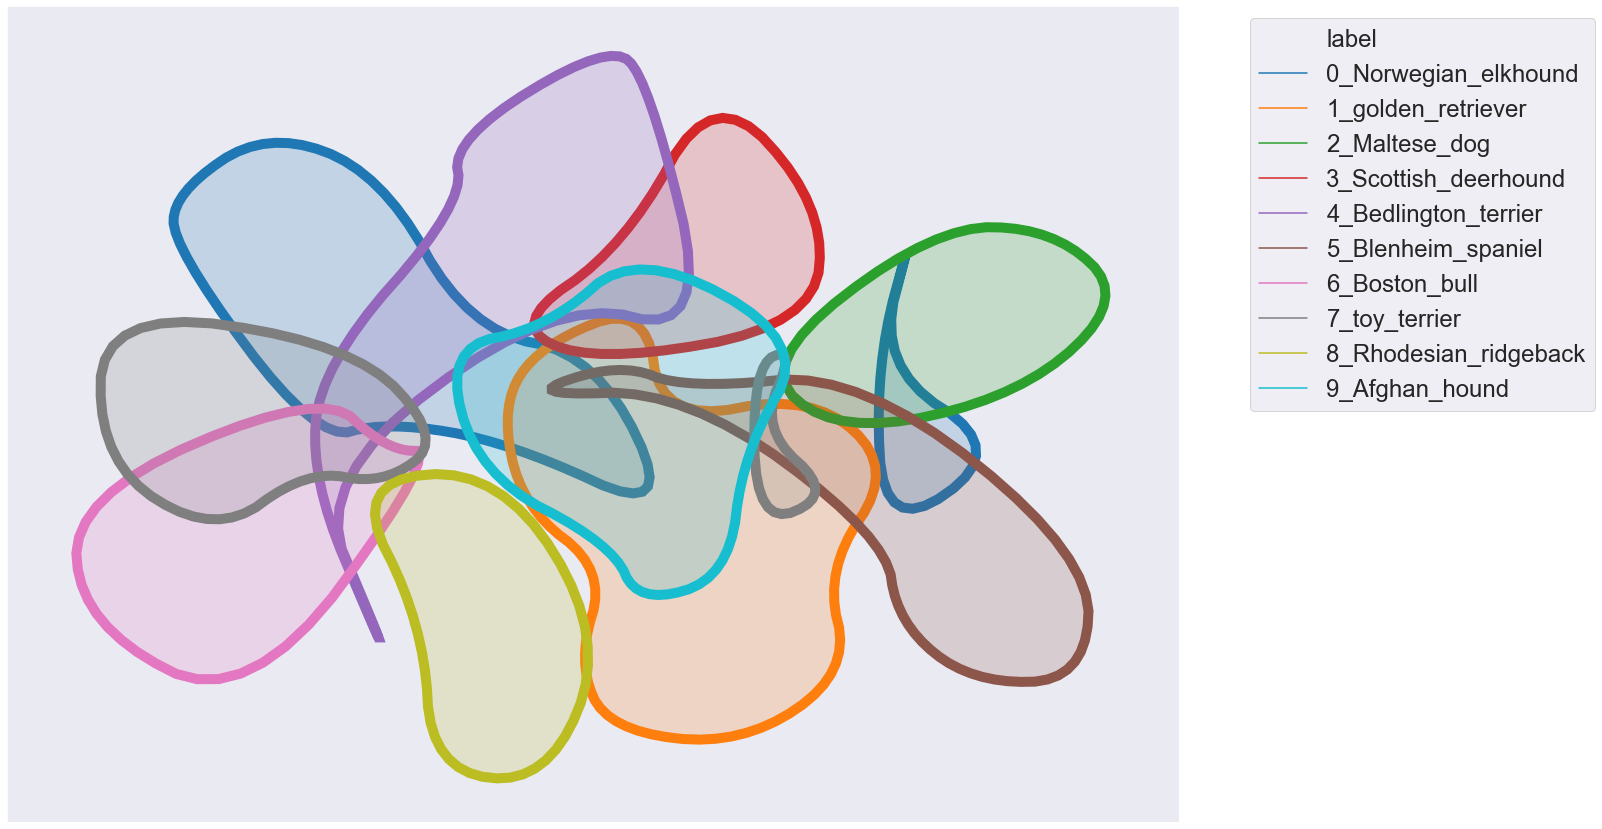

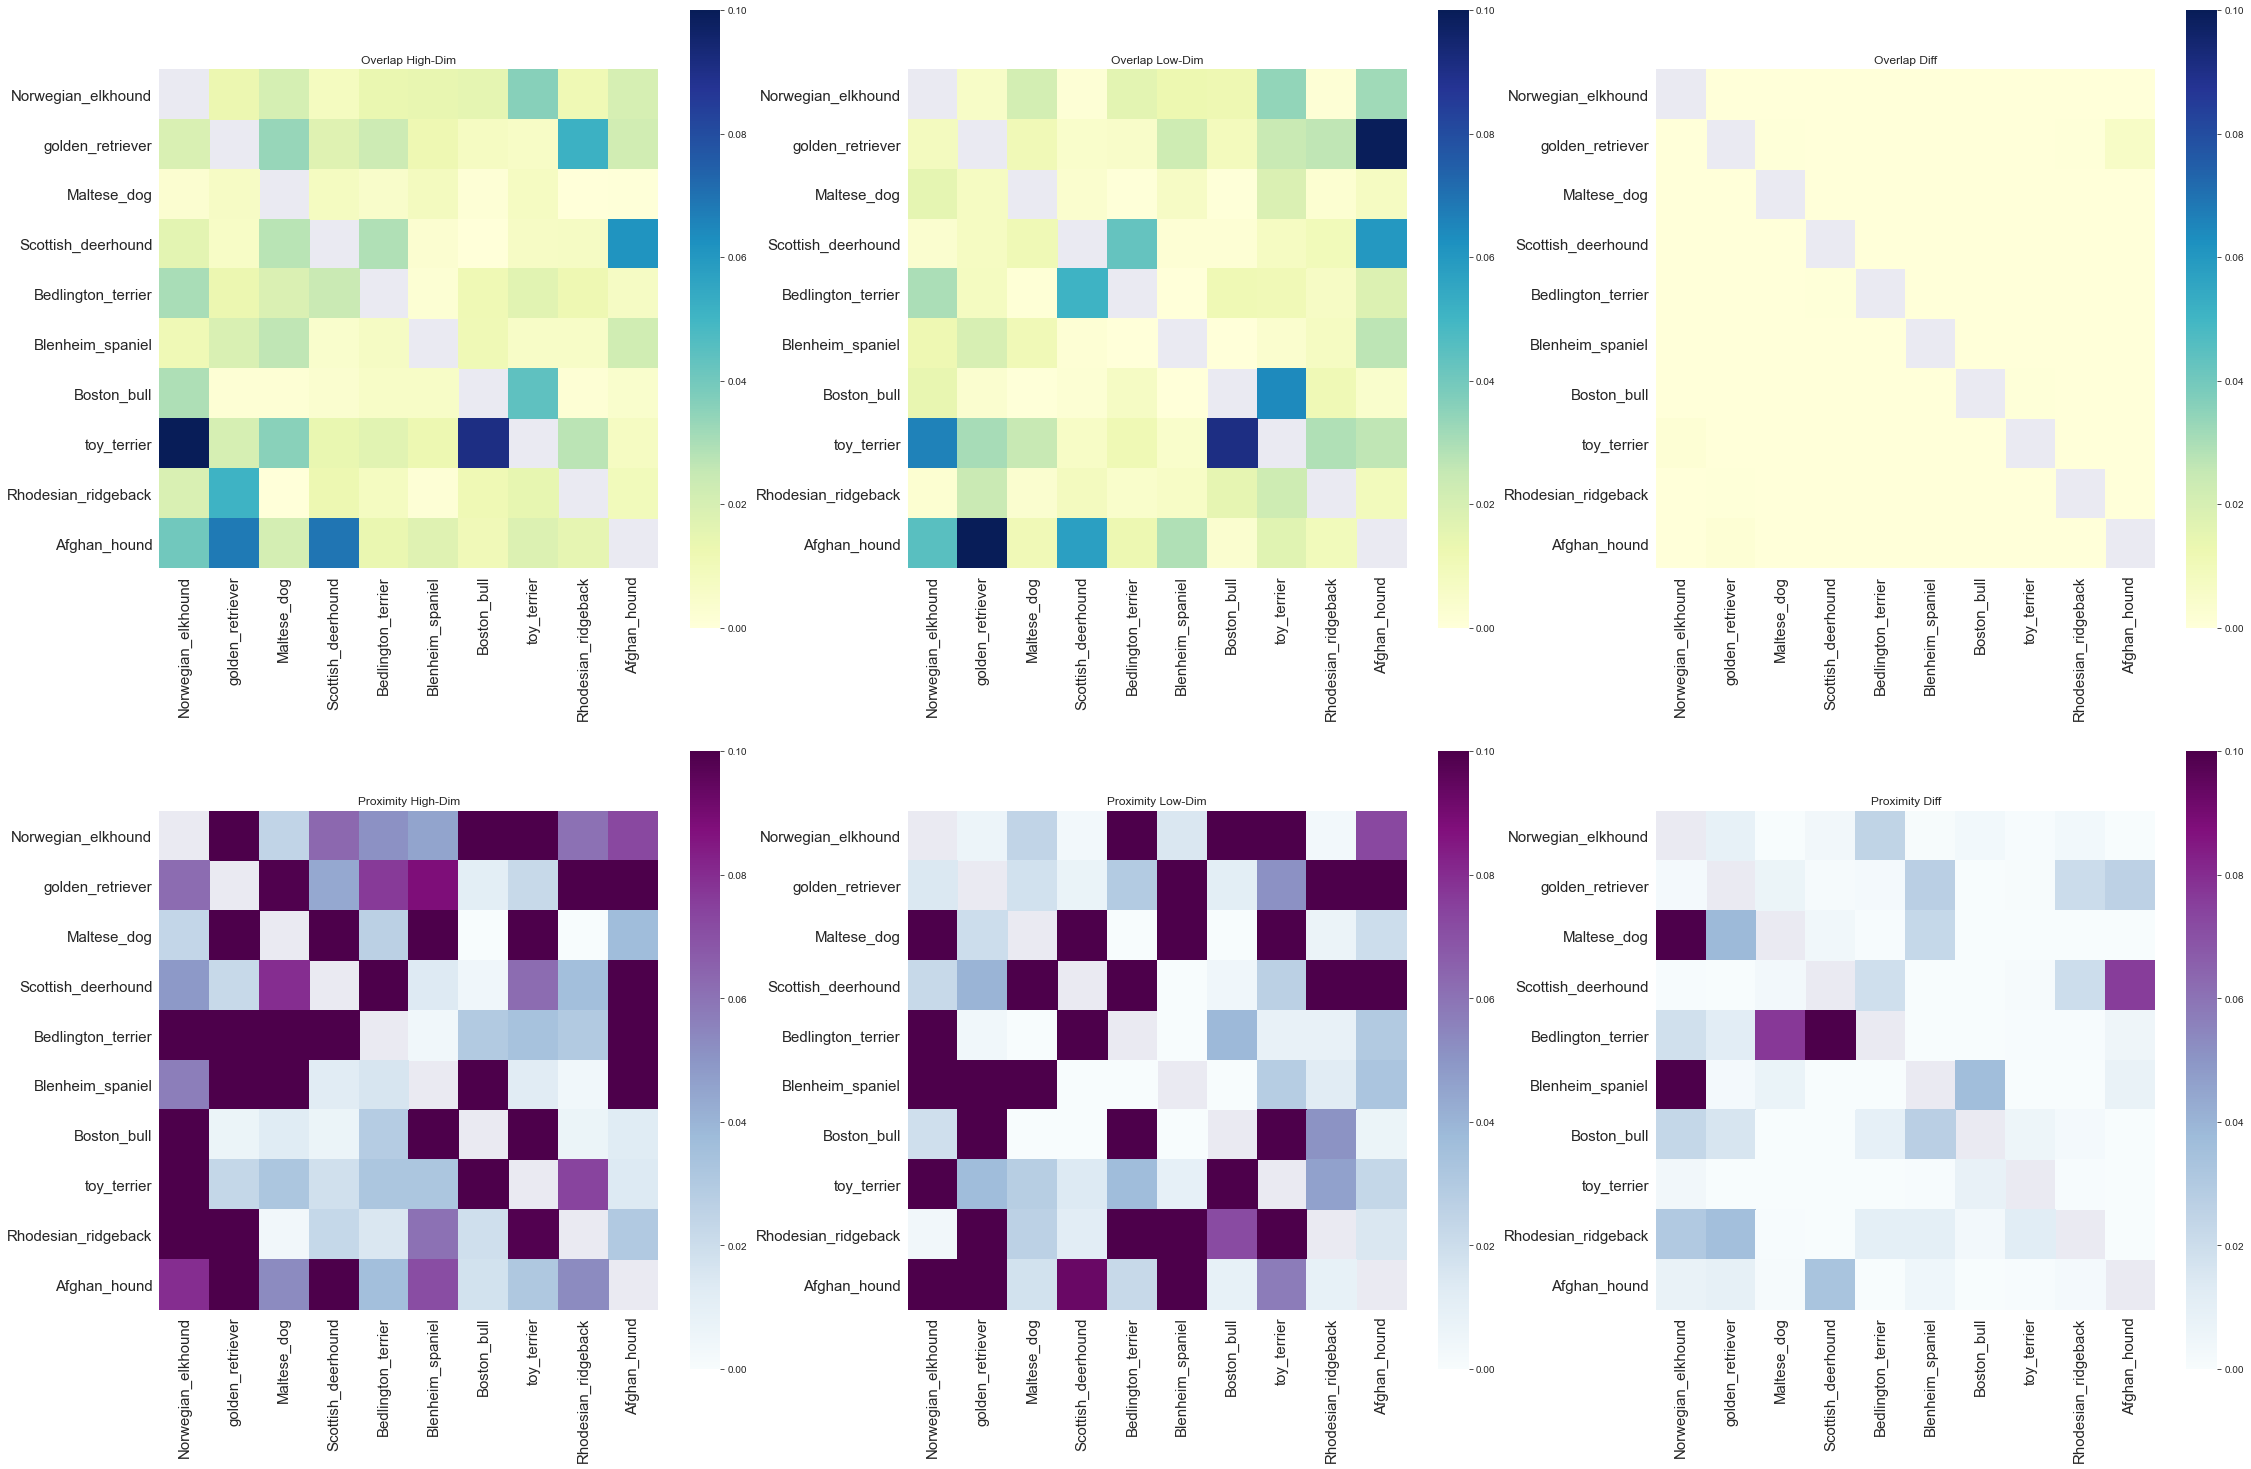

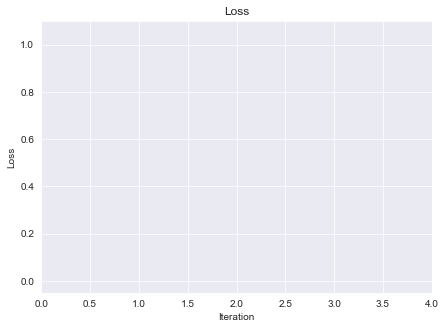

In [12]:
mobilenet_low_dim = mobilenet_cp.fit_transform(X_mobilenet, y_mobilenet)

In [13]:
mobilenet_cp.num_clusters_each_label

array([110,  91,  99,  75,  78,  82, 105,  72,  88,  75], dtype=int64)

# KNN Classifier and Confusion Matrix

In [6]:
ds_vgg_clf = DataSetFactory.get_dataset('vgg_features_imagenet', RANDOM_STATE)
ds_densenet_clf = DataSetFactory.get_dataset('densenet_features_imagenet', RANDOM_STATE)
ds_mobilenet_clf = DataSetFactory.get_dataset('mobilenet_features_imagenet', RANDOM_STATE)

(7890, 4097) 7890
(7888, 1025) 7888
(7888, 1281) 7888


In [7]:
X_vgg_clf, y_vgg_clf = ds_vgg_clf.df[ds_vgg_clf.feature_cols].values, ds_vgg_clf.df[ds_vgg_clf.label_col].values
X_densenet_clf, y_densenet_clf = ds_densenet_clf.df[ds_densenet_clf.feature_cols].values, ds_densenet_clf.df[ds_densenet_clf.label_col].values
X_mobilenet_clf, y_mobilenet_clf = ds_mobilenet_clf.df[ds_mobilenet_clf.feature_cols].values, ds_mobilenet_clf.df[ds_mobilenet_clf.label_col].values

In [26]:
def plot_confusion_matrix(y_true, y_pred, ticks, cmap='Blues', normalize=True, annot=False):
    matrix = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    if normalize:
        matrix = matrix/matrix.sum(axis=1)[:,None]
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    vmax = 0.1
    g = sns.heatmap(matrix, ax=ax, annot=annot, fmt='.3f', square=True, cmap=cmap,
                    vmin=0, vmax=vmax, center=vmax/2,
                    xticklabels=[], yticklabels=ticks, annot_kws={"size": 16}, cbar=False)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    g.set_yticklabels(g.get_yticklabels(), rotation=0)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    ax.set_ylabel('True Label', fontsize=15)
    ax.set_xlabel('Predicted Label', fontsize=15)
    ax.set_title(f'Accuracy: {acc:.2f}' , fontsize=15)
    plt.show()
    
    print(acc)

In [27]:
def train_predict_plot_mat(X, y, ds, model, clf_args=None, fit_args = None, test_size=0.2):
    if clf_args is None:
        clf_args = {}
    if fit_args is None:
        fit_args = {}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)
    
    if model == 'knn':
        clf = KNeighborsClassifier(**clf_args)
    elif model == 'rf':
        clf = RandomForestClassifier(**clf_args)
    elif model == 'nn':
        
        np.random.seed(RANDOM_STATE)
        
        tf.random.set_seed(RANDOM_STATE)

        n_features = X_train.shape[1]
        # define model
        clf = Sequential()
        clf.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        clf.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
        clf.add(Dense(len(np.unique(y_train)), activation='softmax'))
        # compile the model
        clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    clf.fit(X_train, y_train, **fit_args)
    y_predicted = clf.predict(X_test)
    
    if model == 'nn':
        y_predicted = np.argmax(y_predicted, axis=1)
    
    labels = [ds.class_to_label[i] for i in sorted(ds.class_to_label.keys())]
    plot_confusion_matrix(y_test, y_predicted, labels, annot=True)

## VGG

Train on 6312 samples
Epoch 1/15
6312/6312 [==============================] - 1s 212us/sample - loss: 0.5999 - accuracy: 0.8131
Epoch 2/15
6312/6312 [==============================] - 1s 125us/sample - loss: 0.2166 - accuracy: 0.9439
Epoch 3/15
6312/6312 [==============================] - 1s 120us/sample - loss: 0.1521 - accuracy: 0.9596
Epoch 4/15
6312/6312 [==============================] - 1s 123us/sample - loss: 0.1073 - accuracy: 0.9716
Epoch 5/15
6312/6312 [==============================] - 1s 117us/sample - loss: 0.0795 - accuracy: 0.9775
Epoch 6/15
6312/6312 [==============================] - 1s 129us/sample - loss: 0.0553 - accuracy: 0.9883
Epoch 7/15
6312/6312 [==============================] - 1s 123us/sample - loss: 0.0400 - accuracy: 0.9907
Epoch 8/15
6312/6312 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.99 - 1s 145us/sample - loss: 0.0307 - accuracy: 0.9935
Epoch 9/15
6312/6312 [==============================] - 1s 123us/sample - loss: 0.0239 -

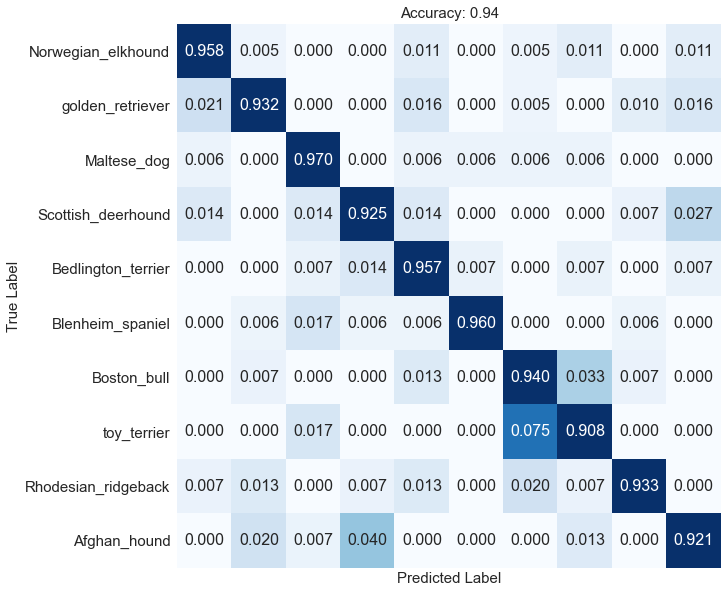

0.9416983523447402


In [28]:
train_predict_plot_mat(X_vgg_clf, y_vgg_clf, ds_vgg_clf, 'nn', fit_args={'epochs':15, 'batch_size':32})

## DenseNet

Train on 6310 samples
Epoch 1/15
6310/6310 [==============================] - 2s 272us/sample - loss: 0.8872 - accuracy: 0.6981
Epoch 2/15
6310/6310 [==============================] - 1s 200us/sample - loss: 0.2163 - accuracy: 0.9417
Epoch 3/15
6310/6310 [==============================] - 1s 127us/sample - loss: 0.1609 - accuracy: 0.9582
Epoch 4/15
6310/6310 [==============================] - 1s 107us/sample - loss: 0.1397 - accuracy: 0.9639
Epoch 5/15
6310/6310 [==============================] - 1s 100us/sample - loss: 0.1248 - accuracy: 0.9683
Epoch 6/15
6310/6310 [==============================] - 1s 104us/sample - loss: 0.1112 - accuracy: 0.9713
Epoch 7/15
6310/6310 [==============================] - 1s 122us/sample - loss: 0.0975 - accuracy: 0.9718
Epoch 8/15
6310/6310 [==============================] - 1s 147us/sample - loss: 0.0897 - accuracy: 0.9759
Epoch 9/15
6310/6310 [==============================] - 1s 169us/sample - loss: 0.0814 - accuracy: 0.9799
Epoch 10/15
6310/6310 [=

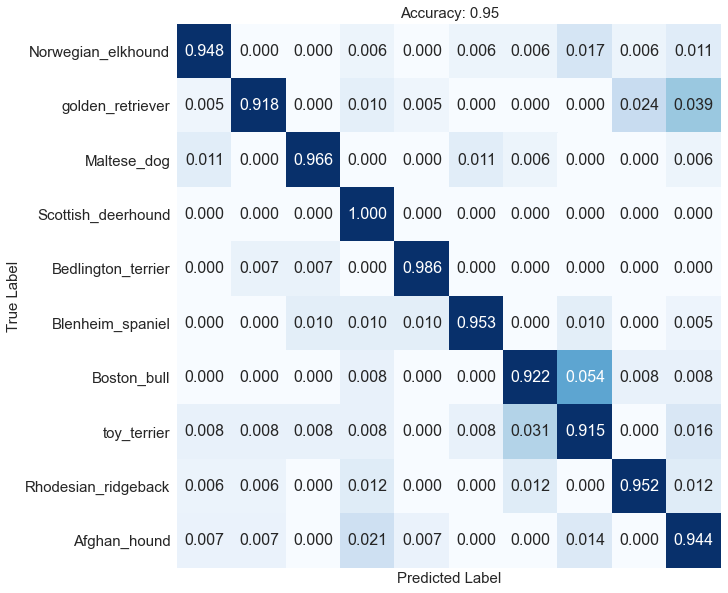

0.9493029150823827


In [29]:
train_predict_plot_mat(X_densenet_clf, y_densenet_clf, ds_densenet_clf, 'nn', fit_args={'epochs':15, 'batch_size':32})

## MobileNet

Train on 6310 samples
Epoch 1/15
6310/6310 [==============================] - 2s 316us/sample - loss: 1.6582 - accuracy: 0.3910
Epoch 2/15
6310/6310 [==============================] - 1s 180us/sample - loss: 0.8797 - accuracy: 0.7098
Epoch 3/15
6310/6310 [==============================] - 2s 294us/sample - loss: 0.4126 - accuracy: 0.8881
Epoch 4/15
6310/6310 [==============================] - 1s 158us/sample - loss: 0.3129 - accuracy: 0.9144
Epoch 5/15
6310/6310 [==============================] - 1s 112us/sample - loss: 0.2661 - accuracy: 0.9261
Epoch 6/15
6310/6310 [==============================] - 1s 108us/sample - loss: 0.2451 - accuracy: 0.9314
Epoch 7/15
6310/6310 [==============================] - 1s 103us/sample - loss: 0.2083 - accuracy: 0.9418
Epoch 8/15
6310/6310 [==============================] - 1s 105us/sample - loss: 0.1929 - accuracy: 0.9488
Epoch 9/15
6310/6310 [==============================] - 1s 119us/sample - loss: 0.1762 - accuracy: 0.9537
Epoch 10/15
6310/6310 [=

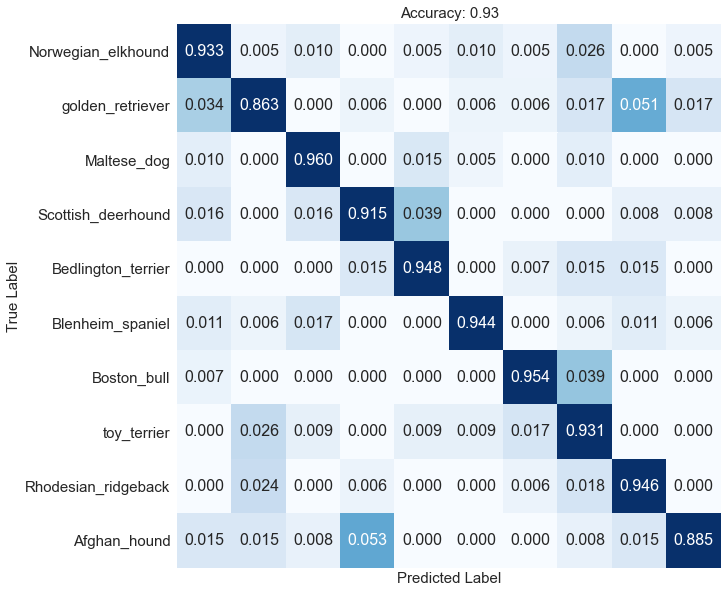

0.9290240811153359


In [30]:
train_predict_plot_mat(X_mobilenet_clf, y_mobilenet_clf, ds_mobilenet_clf, 'nn', fit_args={'epochs':15, 'batch_size':32})